In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import power_transform
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection  import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [2]:
df = pd.read_csv("Loan_Prediction.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# EDA

In [4]:
df.shape

(614, 13)

We have 614 rows and 13 columns

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


We can observe that in Application Income and Coapplicant income 75% value is way smaller than max value

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We have 8 object type variables, 1 integer type variable and 4 float type variable

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Null values are present in Gender, Married, Depenedents,Self_Emplued, LoanAmount, Loan_Amount_term, Credit_History

In [8]:
df['Gender'].fillna(df['Gender'].mode()[0].strip(),inplace=True)
df['Married'].fillna(df['Married'].mode()[0].strip(),inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0].strip(),inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0].strip(),inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(),inplace=True)

We have replaced the null value with more appripriate values

In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Null values are successfully removed

In [10]:
duplicate = df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


No Duplicate rows are present in dataset

In [11]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
df['Loan_ID'].value_counts()

LP001990    1
LP001114    1
LP002317    1
LP001027    1
LP002778    1
           ..
LP001824    1
LP002588    1
LP001603    1
LP002006    1
LP001657    1
Name: Loan_ID, Length: 614, dtype: int64

all id's are unique in Loan_ID This column can be dropped as this doesnot help in prediction and are unique for every data

In [13]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

All values in Gender column are correct

In [14]:
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

All values in Married column are correct

In [15]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

All values in Dependents column are correct

In [16]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

All values in Education column are correct

In [17]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

All values in Self_Employed column are correct

In [18]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

All values in Property_Area column are correct

In [19]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

All values in Loan_Status column are correct

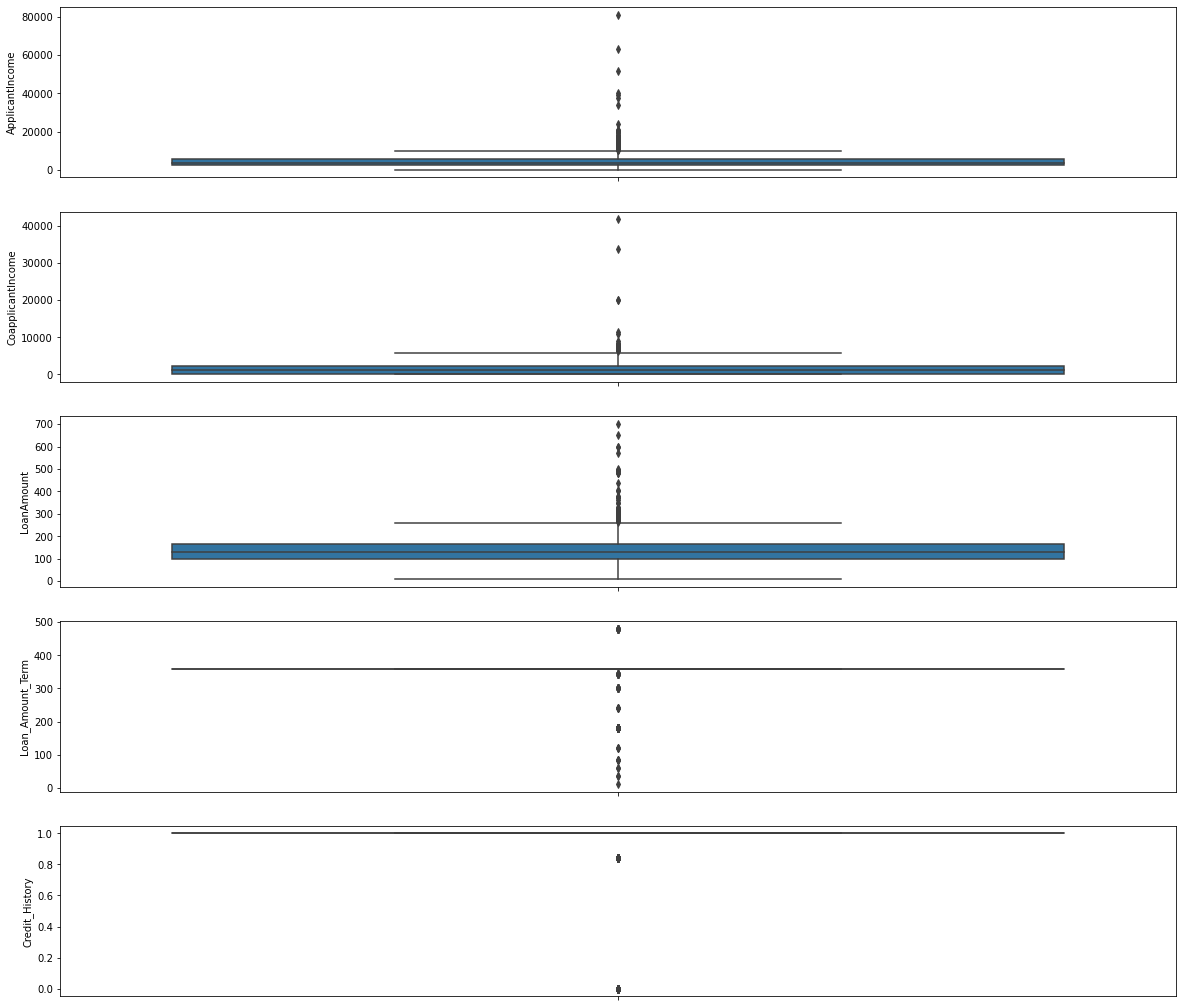

In [20]:

counter=1
plt.figure(figsize=(20,150))
columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']
counter=1;
for i in range(0,len(columns)):
        plt.subplot(40,1,counter)
        counter=counter+1
        sns.boxplot(y=columns[i],hue = columns[i],data=df)
        #sns.boxplot(df[columns[i]])

Outliers are present in 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'

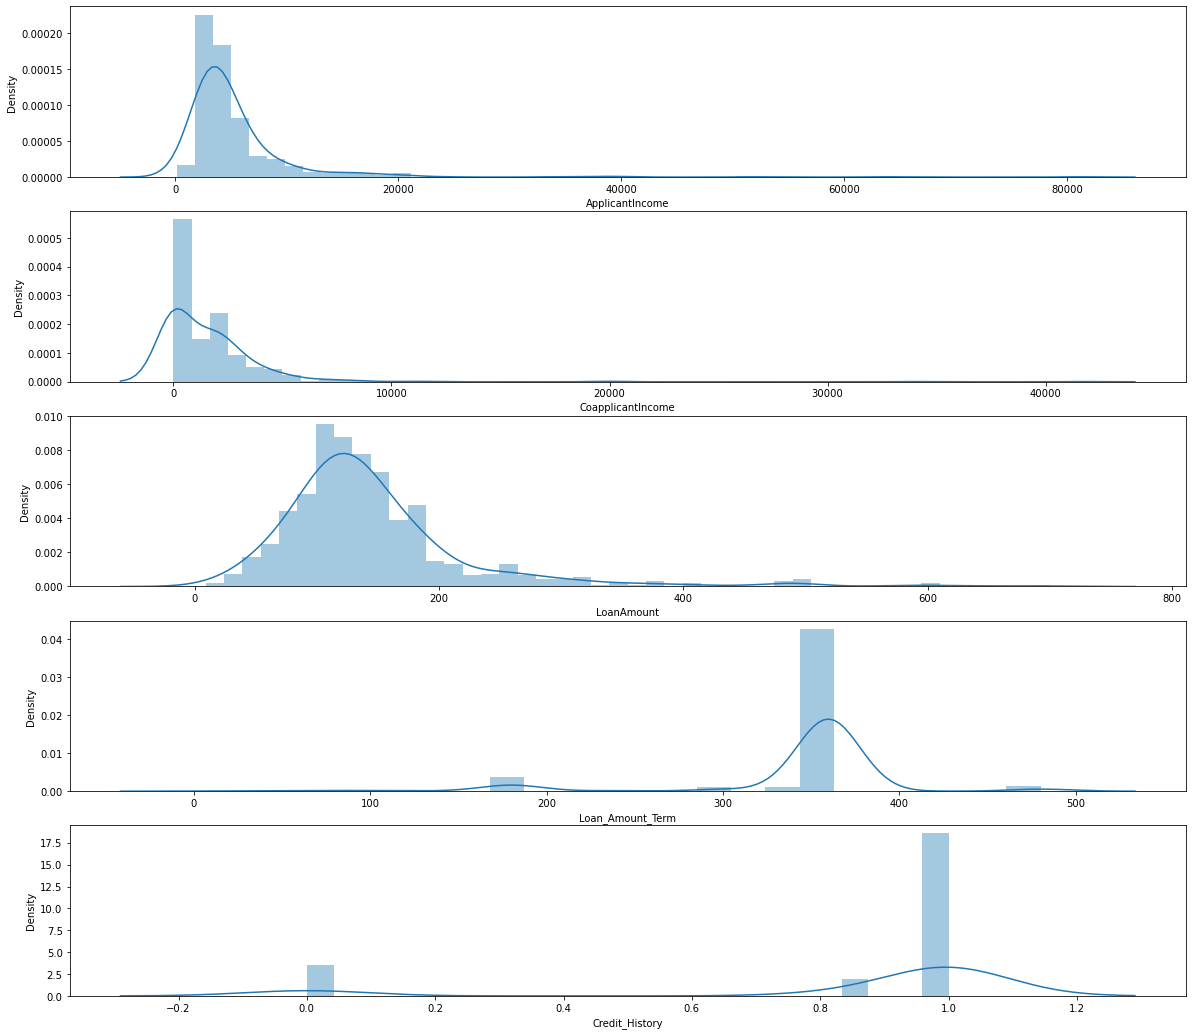

In [21]:

counter=1
plt.figure(figsize=(20,150))
columns =  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']
counter=1;
for i in range(0,len(columns)):
        plt.subplot(40,1,counter)
        counter=counter+1
        sns.distplot(df[columns[i]])

We can observed that data is skewed and not normally distributed in the dataset

<AxesSubplot:>

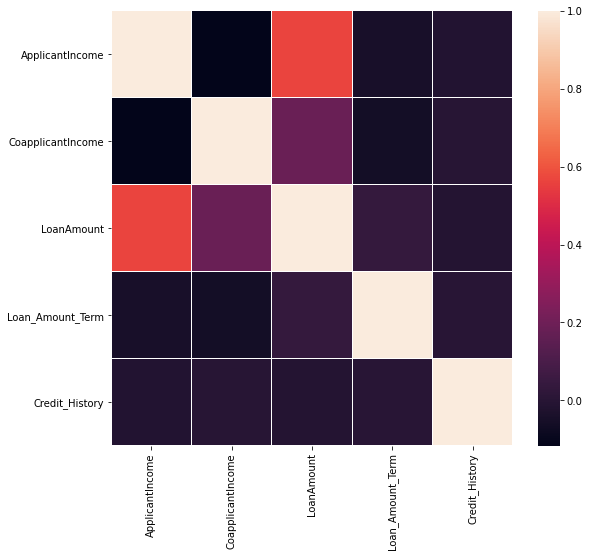

In [22]:
corrmat = df.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, linewidths = 0.1)

We can observe that LoanAmount and Applicant Income is showing a correlation and all other variables have very week or 0 correlation

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

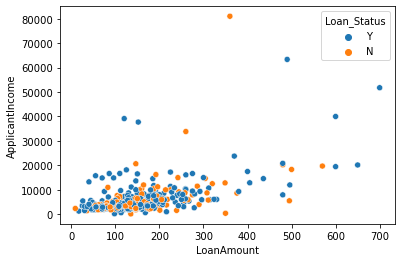

In [23]:
sns.scatterplot(x='LoanAmount',y='ApplicantIncome',hue='Loan_Status',data=df)

We can see that their are some outliers and slight correlation is present between both the columns

In [24]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

Data in above columns is highly skewed

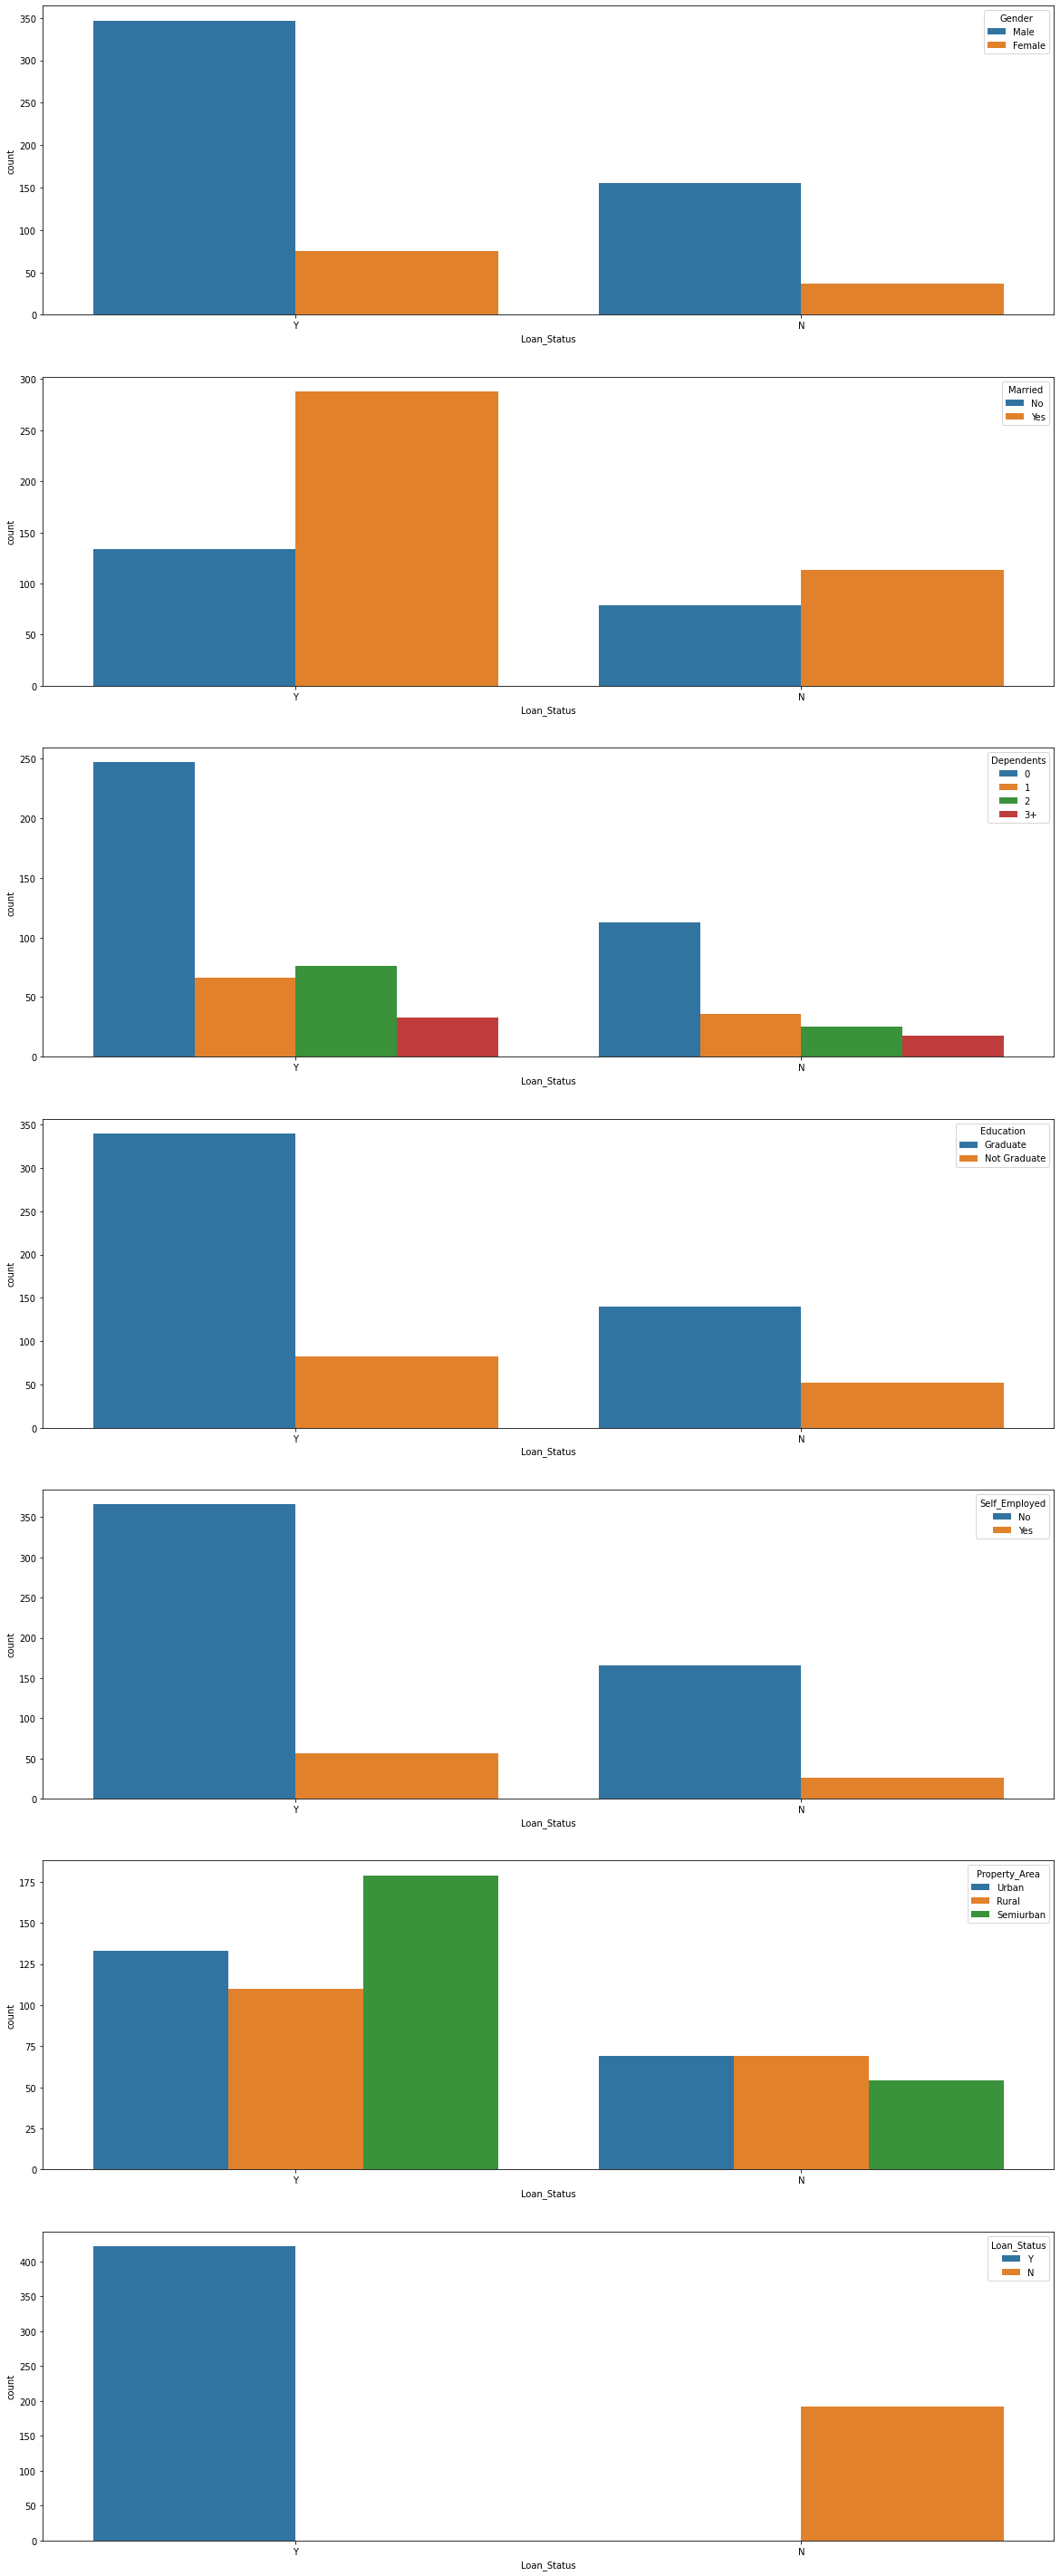

In [25]:
counter=1;
columns =['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Property_Area','Loan_Status']
plt.figure(figsize=(20,300))
for column in columns:
        plt.subplot(40,1,counter)
        counter=counter+1
        sns.countplot(x='Loan_Status',hue=column,data=df)

    We can observe -> 
        Males have more Loan status as Y as compared to Women
        Married couples have more loan status as Y than unmarried couples
        0 Dependents values have more loan status as Y as compared to other Dependents
        Graduated peoples have more loan status as Y as compared to Non Graduates
        Not Self employed people have more loan status as Y as compared to self employed people
        semiurban area have more loan status as Y as compared to other Property Area
        Loan_Status column is highly unbalanced
        

# Labelling the 'Loan_Status' column

In [26]:
df['Loan_Status']=df['Loan_Status'].str.replace('N','0')
df['Loan_Status']=df['Loan_Status'].str.replace('Y','1')

In [27]:

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['Loan_Status'] =  LE.fit_transform(df['Loan_Status'])

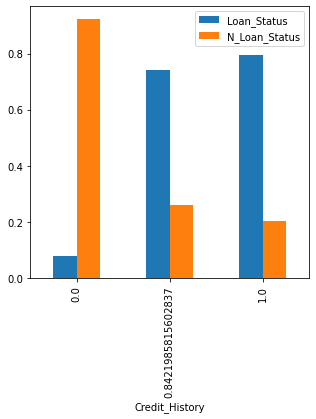

In [28]:
df['N_Loan_Status']=1-df['Loan_Status']
df.groupby('Credit_History').agg('mean')[['Loan_Status', 'N_Loan_Status']].plot(kind='bar', figsize=(5, 5));                                                       

The peoples who have credit History 1 or closer to 1 have more Loan_Status as Y

# dropping Loan id as not required

In [29]:
df.drop('Loan_ID',axis=1,inplace=True)

# converting catagorical into labels

In [30]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for col in ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Property_Area']:
    df[col] =  LE.fit_transform(df[col])

# Removing Outliers

In [31]:
columns =  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']
for i in columns:
    IQR = df[i].quantile(0.75)-df[i].quantile(0.25)
    Barmax =  df[i].quantile(0.75) + 1.5*IQR
    Barmin =  df[i].quantile(0.25) - 1.5*IQR
    df.loc[df[i]>Barmax,i] = Barmax
    df.loc[df[i]<Barmin,i] = Barmin

# confirming removal of outliers

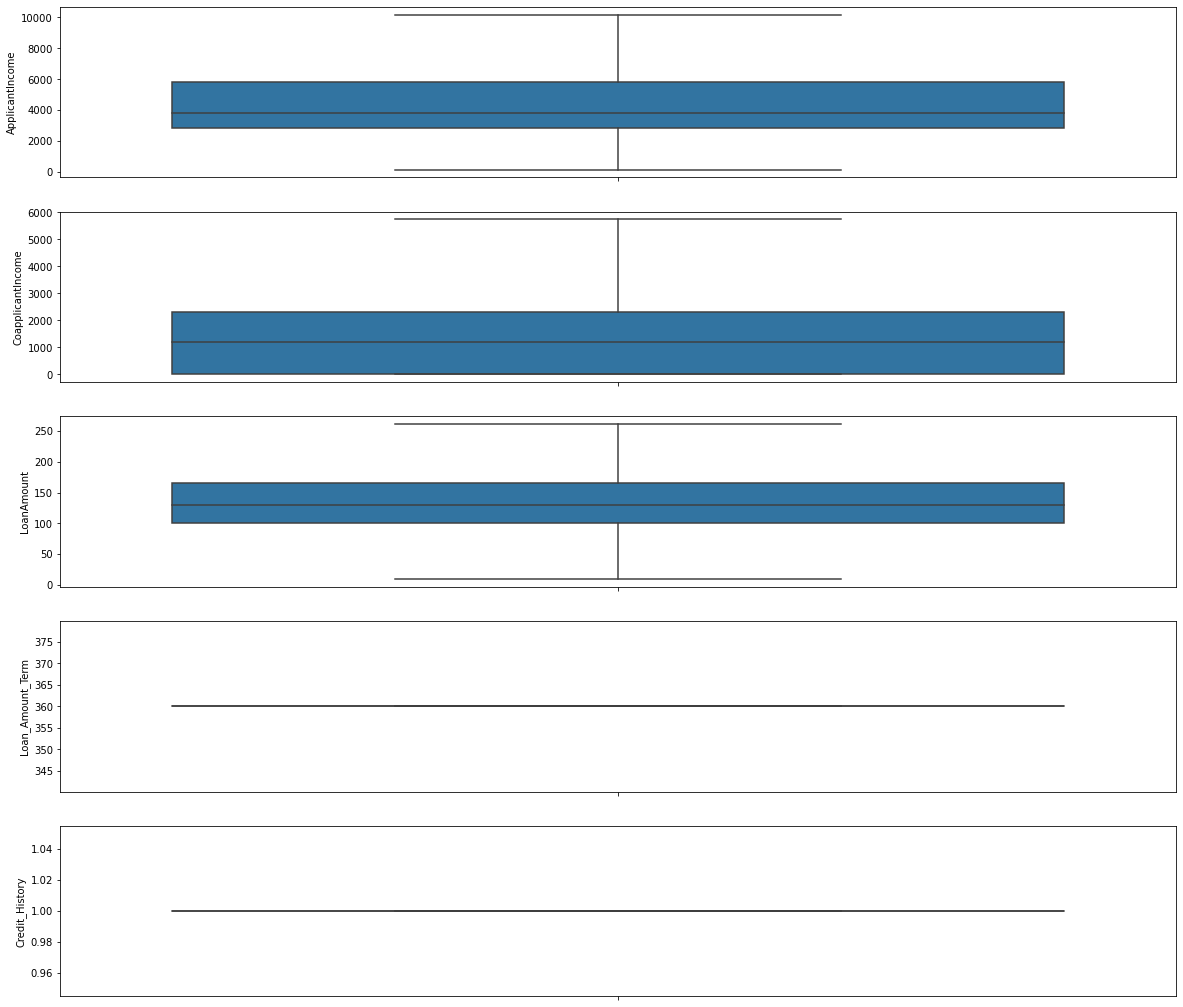

In [32]:

counter=1
plt.figure(figsize=(20,150))
columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']
counter=1;
for i in range(0,len(columns)):
        plt.subplot(40,1,counter)
        counter=counter+1
        sns.boxplot(y=columns[i],hue = columns[i],data=df)
        #sns.boxplot(df[columns[i]])

Outliers are successfuly removed

# Scaling the data

In [33]:
fin_df = df.drop(['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Property_Area','Loan_Status','N_Loan_Status'],axis=1)

In [34]:

scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(fin_df)
final_df = pd.DataFrame(minmax_df, columns = fin_df.columns)

# removing skewness

In [36]:
fin_df_new=power_transform(final_df)
fin_df_new = pd.DataFrame(fin_df_new,columns=final_df.columns)

# confirming removal of skewness

In [38]:
fin_df_new.skew()

ApplicantIncome      0.070752
CoapplicantIncome    0.223804
LoanAmount           0.001991
Loan_Amount_Term     0.000000
Credit_History       0.000000
dtype: float64

skewness is successfulyy removed

In [39]:
fin_df_new = fin_df_new.join(df['Gender'])
fin_df_new = fin_df_new.join(df['Married'])
fin_df_new = fin_df_new.join(df['Dependents'])
fin_df_new = fin_df_new.join(df['Education'])
fin_df_new = fin_df_new.join(df['Self_Employed'])
fin_df_new = fin_df_new.join(df['Property_Area'])
fin_df_new = fin_df_new.join(df['Loan_Status'])


In [40]:
fin_df_new.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,0.749963,-1.020863,0.271259,0.0,0.0,1,0,0,0,0,2,1
1,0.251751,0.395866,-0.068134,0.0,0.0,1,1,1,0,0,0,0
2,-0.608725,-1.020863,-1.452530,0.0,0.0,1,1,0,0,1,2,1
3,-0.896236,0.862148,-0.224481,0.0,0.0,1,1,0,1,0,2,1
4,0.801021,-1.020863,0.174310,0.0,0.0,1,0,0,0,0,2,1


We are ready to build the models

# Train_Test_Split

In [41]:
x = fin_df_new.drop(["Loan_Status"],axis=1)
y = fin_df_new["Loan_Status"]

In [42]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if(acc>maxAccu):
        maxAccu=acc
        maxRS=i
print("Best Accuracy is",maxAccu,"on Random State",maxRS)

Best Accuracy is 0.6829268292682927 on Random State 8


In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=8)

# SMOTE

In [44]:
print("Before OverSampling '1': {}".format(sum(y_train == 1)))
print("Before OverSampling '0': {} \n".format(sum(y_train == 0)))
  

sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print("After OverSampling '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling '0': {}".format(sum(y_train_res == 0)))

Before OverSampling '1': 332
Before OverSampling '0': 159 

After OverSampling '1': 332
After OverSampling '0': 332


# Model Building

Logistic Regression -> 

In [45]:

LogReg = LogisticRegression()
LogReg.fit(x_train,y_train)
pred = LogReg.predict(x_test)
acc = classification_report(y_test, pred)
print(acc)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.73      1.00      0.85        90

    accuracy                           0.73       123
   macro avg       0.37      0.50      0.42       123
weighted avg       0.54      0.73      0.62       123



Decision tree Classifier->

In [47]:

DTC = DecisionTreeClassifier()
DTC.fit(x_train_res,y_train_res)
pred = DTC.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.22      0.33      0.26        33
           1       0.69      0.56      0.62        90

    accuracy                           0.50       123
   macro avg       0.46      0.44      0.44       123
weighted avg       0.57      0.50      0.52       123



Random Forest Classifier->

In [48]:

RFC = RandomForestClassifier()
RFC.fit(x_train_res,y_train_res)
pred = RFC.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.31      0.36      0.33        33
           1       0.75      0.70      0.72        90

    accuracy                           0.61       123
   macro avg       0.53      0.53      0.53       123
weighted avg       0.63      0.61      0.62       123



Naive Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train_res, y_train_res)
pred = gnb.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.30      0.42      0.35        33
           1       0.75      0.63      0.69        90

    accuracy                           0.58       123
   macro avg       0.52      0.53      0.52       123
weighted avg       0.63      0.58      0.60       123



SVM

In [50]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0, tol=1e-5)

clf.fit(x_train_res, y_train_res.ravel()) 
pred = clf.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.30      0.39      0.34        33
           1       0.75      0.66      0.70        90

    accuracy                           0.59       123
   macro avg       0.52      0.52      0.52       123
weighted avg       0.63      0.59      0.60       123



# Cross Vaildation Score

In [51]:

print(cross_val_score(DTC,x,y,cv=5).mean())

0.6156870585099294


In [52]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.6628148740503799


In [53]:
print(cross_val_score(LogReg,x,y,cv=5).mean())

0.6856590697054512


In [54]:
print(cross_val_score(gnb,x,y,cv=5).mean())

0.6758230041316807


In [55]:
print(cross_val_score(clf,x,y,cv=5).mean())

0.6872850859656138


    Logistic Regression -> |0.73 - 0.68| = 0.05
    decision Tree-> |0.50 - 0.61| = 0.11
    Random Forest-> |0.61 - 0.66|=0.05
    Naive bayes-> |0.58 - 0.67|=0.09
    SVM->|0.59 - 0.68| = 0.09
    
    We will choose random forest for Hypertuning as Logistic regression have recall value for 0 as 0.00. The logistic regression model is totally biased.

# Hypertuning

In [56]:
from sklearn.model_selection import GridSearchCV

In [76]:
parameter = {
 'max_depth': [300,600,800,None],
 'min_samples_split': [2,4,8],
    'bootstrap': [True, False],
 'min_samples_leaf': [1, 2, 4],
 'n_estimators': [100, 400, 600, 800]
    
}
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5)


In [77]:
GCV.fit(x_train_res,y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [300, 600, 800, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [100, 400, 600, 800]})

In [84]:
GCV.best_params_

{'bootstrap': True,
 'max_depth': 600,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 600}

# Building final model

In [85]:
Final_model = RandomForestClassifier(min_samples_leaf=1,max_depth=600,min_samples_split=2,n_estimators=600,bootstrap=True)
Final_model.fit(x_train_res,y_train_res)
pred = Final_model.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.27      0.33      0.30        33
           1       0.73      0.67      0.70        90

    accuracy                           0.58       123
   macro avg       0.50      0.50      0.50       123
weighted avg       0.61      0.58      0.59       123



# Auc_Roc curve

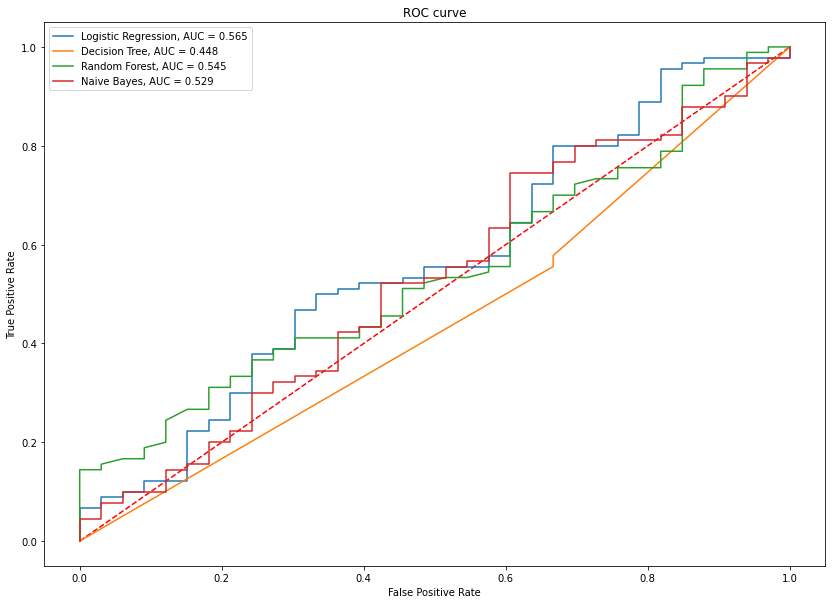

In [86]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fig = plt.figure(figsize=(14,10))
plt.plot([0, 1], [0, 1],'r--')
#KNN

#Logistic Regression
preds_proba_lg = LogReg.predict_proba(x_test)
probslg = preds_proba_lg[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probslg)
auclg = roc_auc_score(y_test, probslg)
plt.plot(fpr, tpr, label=f'Logistic Regression, AUC = {str(round(auclg,3))}')

#Decision Tree Classifier
preds_proba_DTC = DTC.predict_proba(x_test)
probsDTC = preds_proba_DTC[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probsDTC)
aucDTC = roc_auc_score(y_test, probsDTC)
plt.plot(fpr, tpr, label=f'Decision Tree, AUC = {str(round(aucDTC,3))}')

#Random Forest
preds_proba_RFC = Final_model.predict_proba(x_test)
probsRFC = preds_proba_RFC[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probsRFC)
aucRFC = roc_auc_score(y_test, probsRFC)
plt.plot(fpr, tpr, label=f'Random Forest, AUC = {str(round(aucRFC,3))}')

#Naive Bayes
preds_proba_gnb = gnb.predict_proba(x_test)
probsgnb = preds_proba_gnb[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probsgnb)
aucgnb = roc_auc_score(y_test, probsgnb)
plt.plot(fpr, tpr, label=f'Naive Bayes, AUC = {str(round(aucgnb,3))}')

#SVM
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC curve")
plt.rcParams['axes.titlesize'] = 18
plt.legend()
plt.show()

we can observe that Random forest is performing well

# Saving the model

In [88]:
import joblib
joblib.dump(Final_model,"Loan_Prediction.pkl")


['Loan_Prediction.pkl']